# <center><h1><b><font color ='Maroon'>Neural Network Model Optimization</b> </font> </h1><center>

## <b><font color ='Brown'>Import required libaries for preprocessing</b> </font> 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping 

## <b><font color ='Brown'>Loading the data</b> </font> 

In [24]:
df_train = pd.read_csv('train _NN_Optimization.csv')
df_test = pd.read_csv('test_NN_Optimization.csv')
df_sub=pd.read_csv("gender_submission_NN_Optimization.csv")

## <b><font color ='Brown'>Data exploration</b> </font> 

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


## <b><font color ='Brown'>Correlation Map</b> </font> 

<AxesSubplot:>

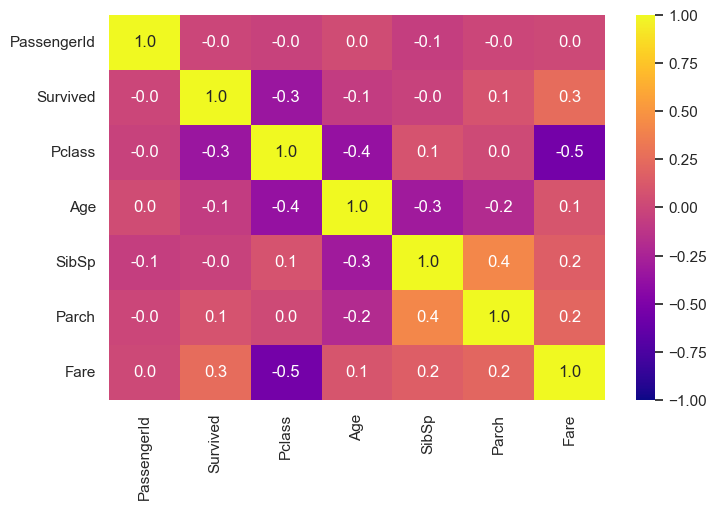

In [27]:
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df_train.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='plasma')

## <b><font color ='Brown'>Converting Data</b> </font> 

In [28]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [29]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_train['Sex'].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [30]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df_train['Embarked'] = df_train.Embarked.map({'S':0,'C':1,'Q':2})

In [34]:
df_train.Embarked.describe()

count    889.000000
mean       0.362205
std        0.636157
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [35]:
df_train.Embarked.fillna(0, inplace = True)
df_train.Age.fillna(29, inplace = True)

In [36]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.560236,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [38]:
predictors = df_sub.drop(['PassengerId'], axis=1).values

In [43]:
# Convert the target to categorical: target
target = to_categorical(df_sub["Survived"])

## <b><font color ='Brown'>Creating a Neural Network</b> </font> 

In [50]:
# Set up the model
nn_model = Sequential()
n_cols = predictors.shape[1]

# Add the first layer
nn_model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Add the output layer
nn_model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
# Create list of learning rates: lr_to_test
learning_rate_list = [.000001, 0.01, 1]

# Loop over learning rates
for lr in learning_rate_list:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = Sequential()
    input_shape = (n_cols,)
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target)





Testing model with learning rate: 0.000001



14/14 [==============================] - 0s 1ms/step - loss: 0.7071





Testing model with learning rate: 0.010000



14/14 [==============================] - 0s 1ms/step - loss: 0.6883





Testing model with learning rate: 1.000000



14/14 [==============================] - 0s 1ms/step - loss: 0.2820


In [54]:
#Evaluating model accuracy on validation dataset
# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3 )

10/10 [==============================] - 1s 18ms/step - loss: 0.6092 - accuracy: 0.9178 - val_loss: 0.5716 - val_accuracy: 1.0000


In [56]:
#Early stopping: Optimizing the optimization
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target,epochs=30,validation_split=0.3,callbacks=[early_stopping_monitor])

Epoch 1/30

10/10 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 1.0000 - val_loss: 0.5072 - val_accuracy: 1.0000

Epoch 2/30

10/10 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 1.0000 - val_loss: 0.4474 - val_accuracy: 1.0000

Epoch 3/30

10/10 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 1.0000 - val_loss: 0.3928 - val_accuracy: 1.0000

Epoch 4/30

10/10 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 1.0000 - val_loss: 0.3420 - val_accuracy: 1.0000

Epoch 5/30

10/10 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 1.0000 - val_loss: 0.2919 - val_accuracy: 1.0000

Epoch 6/30

10/10 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 1.0000 - val_loss: 0.2402 - val_accuracy: 1.0000

Epoch 7/30

10/10 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 1.0000

Epoch 